In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
data = pd.read_csv(r"C:\Users\vaide\OneDrive\Desktop\adult-all (1).csv")



In [104]:
data

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States
48838,64,?,321403,HS-grad,9,Widowed,?,Black,Male,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


In [105]:
data.describe()

,Age,Income,Oldest_Child
count,48842.000000,4.884200e+04,48842.000000
mean,38.643585,1.896641e+05,10.078089
std,13.710510,1.056040e+05,2.570973
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.175505e+05,9.000000
50%,37.000000,1.781445e+05,10.000000
75%,48.000000,2.376420e+05,12.000000
max,90.000000,1.490400e+06,16.000000


In [106]:
data.duplicated().sum()

214

In [107]:
data.isnull().sum() 

Age               0
Role              0
Income            0
Degree            0
Oldest_Child      0
Marital_Status    0
Job               0
Race              0
Gender            0
Born              0
dtype: int64

In [108]:
data.dtypes

Age                int64
Role              object
Income             int64
Degree            object
Oldest_Child       int64
Marital_Status    object
Job               object
Race              object
Gender            object
Born              object
dtype: object

In [109]:
data = data.drop(data.columns[4], axis=1)
data

,Age,Role,Income,Degree,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,White,Female,United-States
48838,64,?,321403,HS-grad,Widowed,?,Black,Male,United-States
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


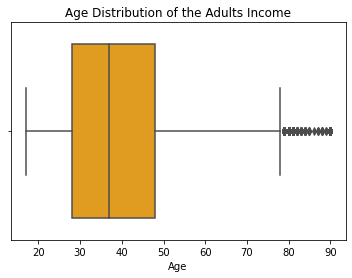

In [110]:
ab=sns.boxplot(x=data['Age'], color="orange").set(title='Age Distribution of the Adults Income')


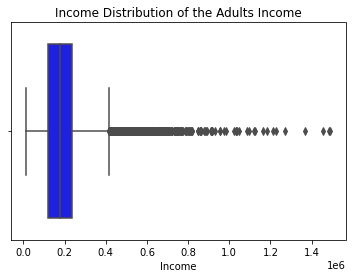

In [111]:
ab=sns.boxplot(x=data['Income'], color="blue").set(title='Income Distribution of the Adults Income')

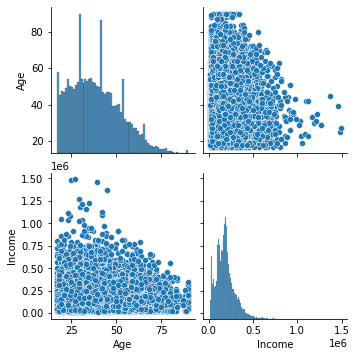

In [112]:
sns.pairplot(data)

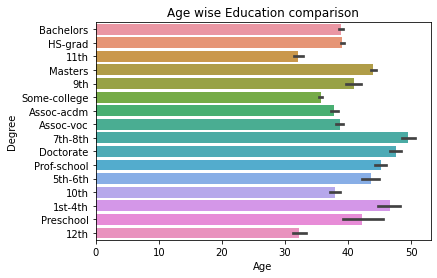

In [113]:
ax = sns.barplot(x="Age", y="Degree", data=data).set(title='Age wise Education comparison')# visualization age wise education

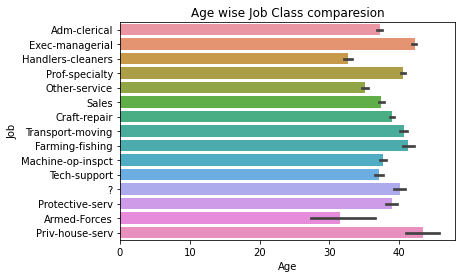

In [114]:
ax = sns.barplot(x="Age", y="Job", data=data).set(title='Age wise Job Class comparesion')# visualization age wise education

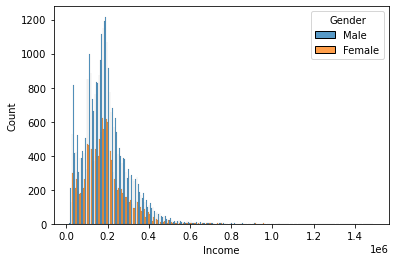

In [115]:
yy=sns.histplot(data=data, x='Income', hue='Gender', multiple="dodge", shrink=0.9)

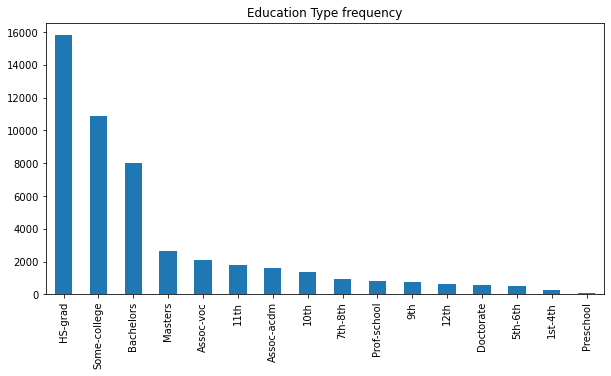

In [116]:
data.Degree.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Education Type frequency')
color="grey";


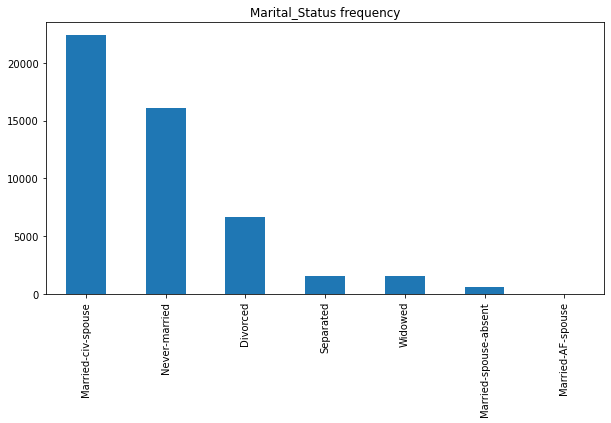

In [117]:
data.Marital_Status.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Marital_Status frequency');

<AxesSubplot:xlabel='Job'>

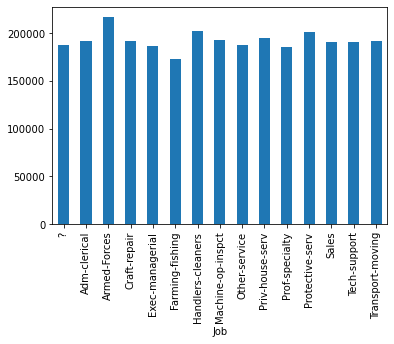

In [118]:
data.groupby('Job').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

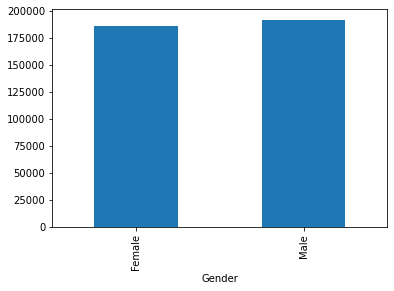

In [119]:
data.groupby('Gender').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Born'>

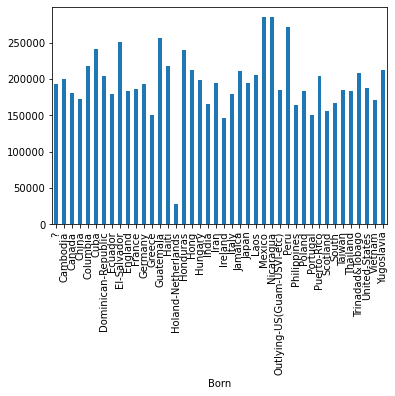

In [120]:
data.groupby('Born').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Race'>

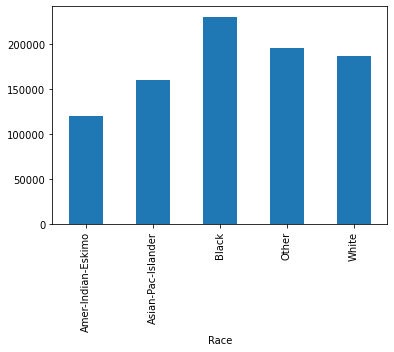

In [121]:
data.groupby('Race').Income.mean().plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status'>

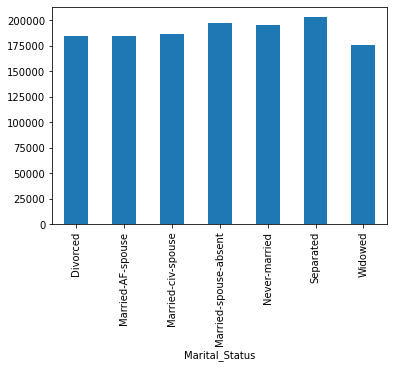

In [122]:
data.groupby('Marital_Status').Income.mean().plot(kind='bar')

In [146]:
X = data.drop(['Race'], axis='columns')
Y = data.Race

In [147]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CT = ColumnTransformer(transformers=[('sc',StandardScaler(),[0]),
                                     ('encoder',OneHotEncoder(),[1,2,3,4])],remainder='passthrough')

CT

ColumnTransformer(remainder='passthrough',
                  transformers=[('sc', StandardScaler(), [0]),
                                ('encoder', OneHotEncoder(), [1, 2, 3, 4])])

In [148]:
data = pd.DataFrame(data)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,train_size=0.8)

In [149]:
knn = KNC(n_neighbors=8)

In [150]:
ab = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = ab.fit_transform(data[column_name])
    else:
        pass

In [151]:
df= data
X=df.iloc[:,:8]
y=df.iloc[:,-1]


In [152]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=151)

In [153]:
# Knn = 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)# Lets initialize model with 3 neighbor

In [154]:
knn.fit(Xtrain, ytrain)#Lets try to fit in the mode

KNeighborsClassifier(n_neighbors=3)

In [155]:
predict = knn.predict(Xtest)

In [156]:
knn.score(Xtest,ytest)

0.8672508394070919

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 86.73 %.


In [158]:
# Knn = 7
knn = KNeighborsClassifier(n_neighbors=7)# Lets initialize model with 3 neighbor

In [159]:
knn.fit(Xtrain, ytrain)#Lets try to fit in the mode

KNeighborsClassifier(n_neighbors=7)

In [160]:
predict = knn.predict(Xtest)

In [161]:
knn.score(Xtest,ytest)

0.8896896241094095

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 88.97 %.


In [163]:
# knn = 10
knn = KNeighborsClassifier(n_neighbors=10)

In [164]:
knn.fit(Xtrain, ytrain)#Lets try to fit in the mode

KNeighborsClassifier(n_neighbors=10)

In [165]:
predict = knn.predict(Xtest)

In [166]:
knn.score(Xtest,ytest)

0.8936205061010565

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, predict)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 89.36 %.
